Nama: Dika Elsaputra

NPM: 2320506032

### Tugas 1: Modifikasi DataFrame PySpark dengan Kolom Tambahan

In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()
# Membuat DataFrame dengan kolom tambahan
data = [
 ("Ali", 34, "Dokter", "Membaca", "L"),
 ("Budi", 23, "Guru", "Bersepeda", "L"),
 ("Citra", 29, "Insinyur", "Menyanyi", "P"),
 ("Dina", 45, "Perawat", "Memasak", "P")
]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)
# Menampilkan DataFrame
df.show()

+-----+----+---------+---------+------+
| Nama|Usia|Pekerjaan|     Hobi|Gender|
+-----+----+---------+---------+------+
|  Ali|  34|   Dokter|  Membaca|     L|
| Budi|  23|     Guru|Bersepeda|     L|
|Citra|  29| Insinyur| Menyanyi|     P|
| Dina|  45|  Perawat|  Memasak|     P|
+-----+----+---------+---------+------+



### Tugas 2: Manipulasi Data dengan PySpark

In [2]:
from pyspark.sql import SparkSession
# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()
# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)
# Filtering data (usia > 30)
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()
# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()
# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



### Tugas 3: Modifikasi DataFrame Pandas

In [8]:
import pandas as pd
# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)
# Menambahkan kolom baru
df_pandas["Pekerjaan"] = ["Dokter", "Guru", "Insinyur", "Perawat"]
# Filtering data (usia > 30)
df_filtered_pandas = df_pandas[df_pandas['Usia'] > 30]
# Menampilkan DataFrame yang telah dimodifikasi
df_filtered_pandas

,Nama,Usia,Pekerjaan
0,Ali,34,Dokter
3,Dina,45,Perawat


### Tugas 4: Penggabungan DataFrame dan Visualisasi dengan Pandas

    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


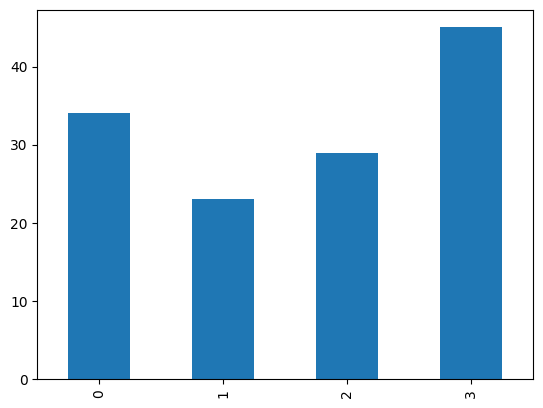

In [10]:
import pandas as pd
# Membuat DataFrame pertama
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)
# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)
# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)
# Menghitung statistik deskriptif
print(df_pandas.describe())
# Plotting Data
import matplotlib.pyplot as plt
df_joined['Usia'].plot(kind='bar')
plt.show()

### Tugas 5: Menggabungkan Data dari PySpark dan Pandas

In [5]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pandas as pd
# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()
# Membuat DataFrame PySpark
data_spark = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns_spark = ["Nama", "Usia"]
df_spark = spark.createDataFrame(data_spark, columns_spark)
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()
# Membuat DataFrame Pandas tambahan
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas = pd.DataFrame(data_pandas)
# Menggabungkan DataFrame Pandas dengan DataFrame dari PySpark
df_combined = pd.merge(df_pandas_from_spark, df_pandas, on="Nama")
# Melakukan analisis sederhana (menghitung rata-rata usia)
average_age = df_combined["Usia"].mean()
print(f"Rata-rata usia: {average_age}")

Rata-rata usia: 32.75


### Tugas 6: Konversi DataFrame dan Operasi Statistik

In [7]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()
# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)
# Menggabungkan data dari PySpark dan Pandas
df_combined_spark = spark.createDataFrame(df_combined)
# Operasi statistik (menghitung nilai maksimum usia)
max_age = df_combined_spark.agg({"Usia": "max"}).collect()[0][0]
print(f"Usia maksimum: {max_age}")

Usia maksimum: 45
